<a href="https://colab.research.google.com/github/RahulJuluru2/Unit3Assignment/blob/main/U3W13_21_Alphabet_Recognition_MLP_Pytorch_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment you will be able to :

* classify EMNIST data using MLPClassifier
* understand how to implement MLP using PyTorch to run on GPU 
* classify EMNIST data using MLP PyTorch



In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/alphabet_recognition_MLP_pytorch_walkthrough.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

The EMNIST dataset is a set of handwritten alphabet digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.

The EMNIST train and test files contain gray-scale images, from one through twenty six.

Each image is 28 pixels in height and 28 pixels in width, and a total of 784 pixels. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255, inclusive. 

The training set and the testing data set, has 785 columns. The first column, called "label", is the alphabet digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

## Setup Steps

In [ ]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id="2216842"#@param{type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="9959488784"#@param{type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U3W13_21_Alphabet_Recognition_MLP_Pytorch_C" #name of the notebook

def setup(): 
    ipython.magic("sx pip install torch") 
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/EMNIST-Train.zip")
    ipython.magic("sx unzip EMNIST-Train.zip")
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/EMNIST-Test.zip")
    ipython.magic("sx unzip EMNIST-Test.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing required packages

* First, we import pytorch, the deep learning library.


* We also import torch.nn (pytorch’s neural network library), torch.nn.functional (includes non-linear functions like ReLu and sigmoid) and torch.optim for implementing various optimization algorithms.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn      
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Load the EMNIST Train data

In [ ]:
training_letters = pd.read_csv('/content/EMNIST-Train.csv')

In [ ]:
training_letters.shape

(62400, 785)

## Get the features(pixels) and labels from the trainset

In [ ]:
# Rescale the train images by dividing every pixel in every image by 255
# Storing the features(pixel values for every image)
train_images = training_letters.iloc[:,1:].values/255

# Storing the labels(alphabet digits)
train_labels = training_letters.iloc[:,0].values

print("Train Labels before getting 0 based indices\n", np.unique(train_labels))
print("\n")

# For getting train labels 0 based indices
train_labels = train_labels - 1
print("Train Labels after getting 0 based indicies\n", np.unique(train_labels))

Train Labels before getting 0 based indices
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


Train Labels after getting 0 based indicies
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


## Plotting the training images

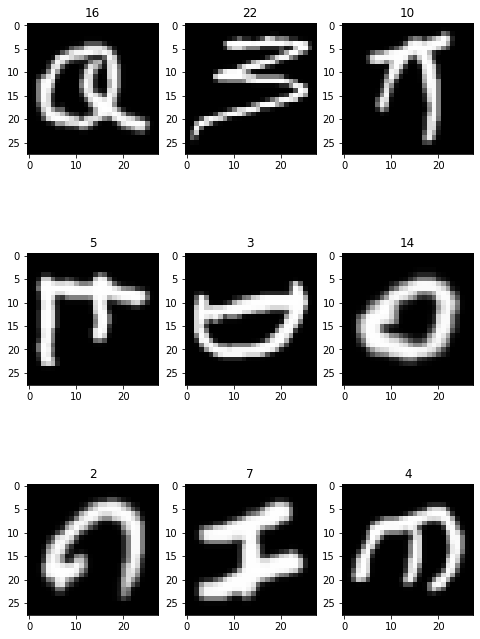

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(8,12))
for i,ax in enumerate(axes.flat):
    ax.imshow(train_images[i].reshape(28,28), cmap ='gray')
    ax.set_title(train_labels[i])

## Split the train data into train and test sets


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_images,train_labels,test_size=0.25, random_state=1)

## Apply MLP Classifier

#### Train the model

Note: This task will take more time for execution

In [ ]:
# Create an object for MLP Classifier
clf = MLPClassifier()

# Fit the data to the model       
clf.fit(X_train, Y_train)

# Get the predictions on the test data
pred = clf.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy_score(Y_test, pred) 

0.8910897435897436

#### Test the model

In [ ]:
# Load the test data
testing_letters = pd.read_csv('/content/EMNIST-Test.csv')
print(testing_letters.shape)

(10400, 785)


In [ ]:
# Rescale the train images by dividing every pixel in every image by 255
# Storing the features(pixel values for every image)
test_images = testing_letters.iloc[:,1:].values/255

# Storing the test labels(alphabet digits)
test_labels = testing_letters.iloc[:,0].values 

# For getting test labels 0 based indices
test_labels = test_labels - 1

In [ ]:
# Get the predictions on the test images
testdata_pred = clf.predict(test_images)

In [ ]:
# Calculate the accuracy 
accuracy_score(testdata_pred, test_labels) 

0.8936538461538461

## MLP Pytorch

#### Prepare the data

**torch.utils.data.DataLoader** class represents a Python iterable over a dataset, with following features.

1. Batching the data
2. Shuffling the data


The batches of train and test data are provided via data loaders that provide iterators over the datasets to train our models.

In [ ]:
# Initializing batch size
batch_size =100

# The TensorDataset takes an arbitrary number of input tensors by converting the train images from numpy array to tensor and converting labels using LongTensor to get scalar int values
train_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(train_images),torch.LongTensor(train_labels))
test_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(test_images),torch.LongTensor(test_labels))

# Loading the train dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

**Initializing CUDA**

CUDA is used as an interface between our code and the GPU.

Normally, we run the code in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [ ]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 1.12.0+cu113 CUDA: True


If it's False, then we run the program on CPU. If it's True, then we run the program on GPU.

Let us initialize some GPU-related variables:

In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

#### Define the Neural Network 

Let's define the network as a Python class.

There are three functions that are defined in this class:

- ### **\__init__()**:
In this function, we shall declare all the layers of our neural network, including the number of neurons, kernel size etc.

- ### **forward()**:
This is the function that is used to compute forward pass of the network. Here, we shall connect the different layers we had defined in \__init__(), according to the network architecture we want to make. In this case, $x -> fc1 -> relu -> fc2 -> out$.

"forward" can be called by calling the object of this class directly. For example:

```
model = Net()
out = model(x)
```


- ### **backward()**:
This function is used to compute gradients across the entire network, and is called from the loss function at the end of the network.

```
loss.backward()
```

We have to write the **\__init__()** and **forward()** methods, and PyTorch will automatically generate a **backward()** method for computing the gradients for the backward pass.

In this case, we pass input (X) through the first layer, pass it’s output through the Relu layer, pass it's output through second layer, pass it's output to the relu layer, pass it's output through the third layer, pass it's output through the log softmax layer.

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 150)
        self.fc2 = nn.Linear(150, 100) 
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 26) 
      
        
    def forward(self, x):  
          
        out = x.view(-1,784)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.relu(self.fc4(out))
        out = self.fc5(out)
        out = F.log_softmax(out, dim=1)
        return out # The output layer is a linear layer with LogSoftmax as activation function because, this is a classification problem.

Let us declare an object of class Net, and make it a CUDA model if CUDA is available:

#### Calling the instances of the network

Let us declare an object of class Net, and make it a CUDA model if CUDA is available:

In [ ]:
model = Net()
model = model.to(device)  

In [ ]:
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=26, bias=True)
)


#### Declaring loss function and optimizer

In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Training and Testing the model


In Training Phase, we iterate over a batch of images in the train_loader. For each batch, we 
perform  the following steps:

* First we zero out the gradients using zero_grad()

* We pass the data to the model i.e. we perform forward pass by calling the forward()

* We calculate the loss using the actual and predicted labels

* Perform Backward pass using backward() to update the weights

In [ ]:
# No of Epochs
num_epochs = 10

# Loop for no of epochs
for epoch in range(num_epochs): 
    correct = 0
    iter_loss = 0.0

    # keeping the network in train mode
    model.train()
    train_loss, train_accuracy = [], []
    
    # Loop through each batch of images in train set
    for (inputs, labels) in train_loader:

        # Convert the inputs and label to gpu for faster execution
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Zero out the gradients from the preivous step 
        optimizer.zero_grad() 
        
        # Passing the data to the model (Forward Pass)
        outputs = model(inputs)

        # Calculating the loss
        loss = criterion(outputs, labels)  
        iter_loss += loss.item() 
        
        # Performing backward pass (Backpropagation)
        loss.backward() 

        # optimizer.step() updates the weights accordingly                      
        optimizer.step() 
         
        # Get the predictions by returning the maximum value of all elements in the output tensor. 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        
    train_loss.append(iter_loss/len(train_dataset))
    # Calculate the accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))
    print ('Epoch {}/{}, Training Accuracy: {:.3f}'.format(epoch+1, num_epochs, train_accuracy[-1]))

Epoch 1/10, Training Accuracy: 65.077
Epoch 2/10, Training Accuracy: 84.226
Epoch 3/10, Training Accuracy: 87.909
Epoch 4/10, Training Accuracy: 89.880
Epoch 5/10, Training Accuracy: 91.152
Epoch 6/10, Training Accuracy: 92.119
Epoch 7/10, Training Accuracy: 92.843
Epoch 8/10, Training Accuracy: 93.468
Epoch 9/10, Training Accuracy: 93.928
Epoch 10/10, Training Accuracy: 94.364


Now we are ready to train our model using the train() function. An epoch means one pass through the whole training data. After each epoch, we evaluate the model using eval():



In Testing Phase, we iterate over a batch of images in the test_loader without changing  weights. For each batch we perform the following steps:

* We pass the images through the model (network) to get the outputs
* Pick the class / label with the highest probability
* Calculate the accuracy


In [ ]:
# Keeping the network in evaluation mode 
model.eval()

Test_accuracy=0
for images, labels in test_loader:
    
      # Convert the images and labels to Pytorch tensor 
      images = images.to(device)
      labels = labels.to(device)

      # Passing images to the model, which return the probabilites as outputs
      test_output = model(images) 

      # Picking the class/label with maximum probability                                                                 
      _, predicted = torch.max(test_output, 1)
      Test_accuracy += (predicted == labels).sum().item()

# Calculating the accuracy
Accuracy = 100 * Test_accuracy/ len(test_dataset)
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 89.875


# Please answer the questions below to complete the experiment:




In [ ]:
#@title State TRUE or FALSE: model.eval() in the testing phase also continues in updating the weights { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"] 


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2084
Date of submission:  08 Aug 2022
Time of submission:  10:39:03
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
